<h2><center> Sentiment Analysis on Skytrax Customer Reviews </center><h>

In [2]:
import pandas as pd
import os
import re
import textblob
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim import corpora
import gensim
from textblob import TextBlob
import string
from textblob import Blobber
import csv

### 1. Data Source - CSV file

In [3]:
cwd = os.getcwd()
url = cwd + '/Dataset_670/airline.csv'
airline = pd.read_csv(url, encoding = "latin-1", index_col = 0)

In [4]:
airline.columns

Index(['link', 'title', 'author', 'author_country', 'date', 'content',
       'aircraft', 'type_traveller', 'cabin_flown', 'route', 'overall_rating',
       'seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'ground_service_rating',
       'wifi_connectivity_rating', 'value_money_rating', 'recommended'],
      dtype='object')

In [5]:
airline.shape

(41396, 19)

### 2. Data Cleaning - Review Column

In [6]:
from bs4 import BeautifulSoup
def review_to_words( raw_review ):
    
    
    # 1. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 3. Create set of stopwords for reviews
    stops = stopwords.words("english")                
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   


airline["content"]=airline["content"].apply(review_to_words)

In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, color, title = None):
    wordcloud = WordCloud(
        background_color= color,
        stopwords=stopwords,
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=0 
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

### 3. Word Cloud Visualization

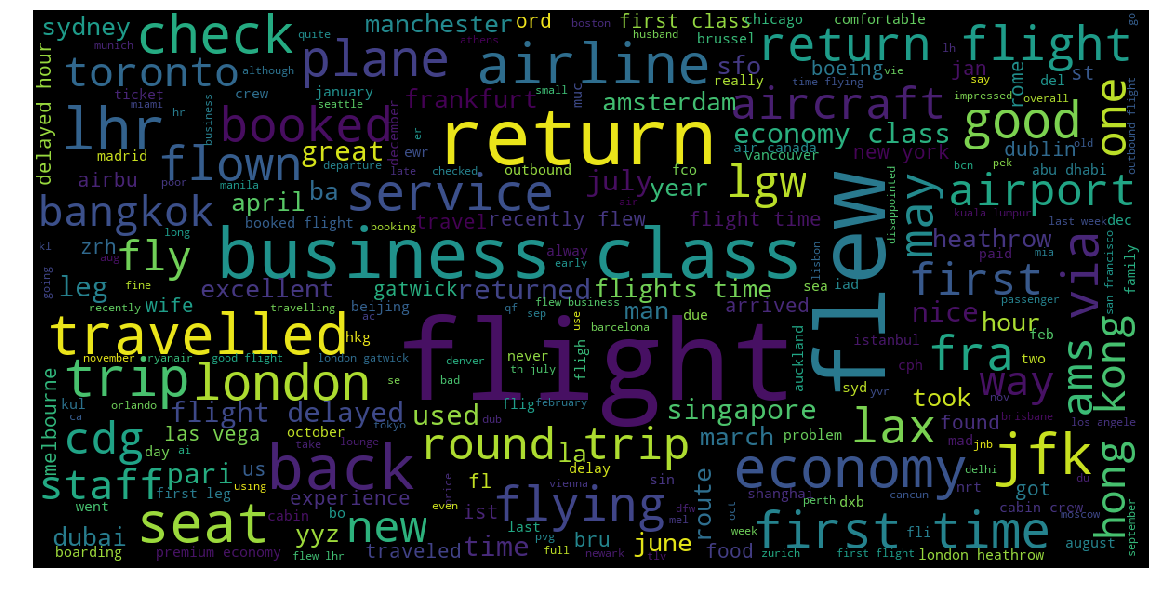

In [8]:
show_wordcloud(airline["content"].to_string(index=False),'black')

<h5><center> word cloud of reviews in the dataset </center></h>

### 4. LDA Technique for Topic Modeling

In [12]:
dfList = airline['content'].tolist()

from wordcloud import WordCloud, STOPWORDS


tweetList=[]
stops = set(STOPWORDS)
stemmer = nltk.stem.SnowballStemmer('english')
lemmatizer = nltk.wordnet.WordNetLemmatizer()

for tweet in dfList:
    rawTweet = tweet
    #print(rawTweet)
    #print(processedTweet)
    processedTweet = rawTweet.strip()
    processedTweet = processedTweet.translate(str.maketrans('','',string.punctuation))
    processedTweet = review_to_words(processedTweet)
    tweetTokens = nltk.word_tokenize(processedTweet)

    for token in tweetTokens:
        if token in stops:
            tweetTokens.remove(token)

    for token in tweetTokens:
        oldToken = token
        tweetTokens.remove(token)
        oldToken = lemmatizer.lemmatize(oldToken)
        tweetTokens.append(oldToken)

    processedTweet = ' '.join(tweetTokens)
    #print(processedTweet)

    if len(tweetTokens) > 3:
        tweetList.append(processedTweet)
#print(tweetList)

texts = [[text for text in doc.split()] for doc in tweetList]
#print(texts)
dictionary = corpora.Dictionary(texts)
#print("printing dictionary",dictionary.token2id)
print(dictionary)
doc_term_matrix = [dictionary.doc2bow(doc.split()) for doc in tweetList]
#print(doc_term_matrix)
ldaObject = gensim.models.ldamodel.LdaModel
ldaModel = ldaObject(doc_term_matrix,num_topics=3,id2word=dictionary,passes=20)
print(ldaModel.print_topics(num_topics=3, num_words=10))
print("LDA analysis complete")

Dictionary(28639 unique tokens: ['airport', 'chaos', 'check', 'complimentary', 'crews']...)
[(0, '0.025*"seat" + 0.018*"flight" + 0.011*"food" + 0.008*"seats" + 0.008*"service" + 0.008*"class" + 0.007*"economy" + 0.007*"cabin" + 0.007*"one" + 0.007*"crew"'), (1, '0.032*"flight" + 0.023*"good" + 0.016*"service" + 0.014*"time" + 0.014*"food" + 0.013*"crew" + 0.010*"friendly" + 0.010*"cabin" + 0.009*"staff" + 0.008*"excellent"'), (2, '0.042*"flight" + 0.011*"time" + 0.011*"hour" + 0.010*"plane" + 0.009*"airport" + 0.009*"airline" + 0.008*"check" + 0.007*"delayed" + 0.007*"told" + 0.006*"one"')]
LDA analysis complete


# 5. Topic Modeling Visualization using pyLDAvis

In [13]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [16]:
vis_data = gensimvis.prepare(ldaModel, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

The Value of λ = Ratio of frequency given the topic to the overall frequency of the word. We can reduce the weight of this ratio by decreasing the value. Ideal value is set at 0.05

<h2><center> Sentiment Analysis using TextBlob </center><h>

#### We are going to perfrom Sentiment Analysis to assign polarity and subjectivity score to each review

We are going to categorize each airline score and visualize them in order to understand the score distribution

In [29]:
#now we are going to use textblobber fuction to generate score

polarity = []
sub = []
for sentance in airline["content"]:
    #print(sentance)
    #Step 4 Perform Sentiment Analysis on the reviews
    analysis = TextBlob(sentance)
    #print (analysis.sentiment)
    polarity.append(analysis.polarity)
    sub.append(analysis.subjectivity)
    # I am using classifer fuction to classify the reviews
    #rst = blobber(sentance)
    #end = [sentance, rst.sentiment.classification]
    #cls.append(end[1])

airline["polarity"] = polarity
airline["subjectivity"] = sub

In [36]:
airline[['content', 'polarity', 'subjectivity']].head()

,content,polarity,subjectivity
airline_name,,,
adria-airways,outbound flight fra prn hours min flight thoug...,0.193750,0.587500
adria-airways,two short hops zrh lju lju vie fast crj seats ...,0.386111,0.633333
adria-airways,flew zurich ljubljana jp newish crj flight alm...,0.432292,0.647917
adria-airways,adria serves min flight ljubljana amsterdam br...,0.173864,0.337879
adria-airways,waw skj economy free snacks drinks star allian...,0.213889,0.619444


## 6. Export to CSV and Visualization using Tableau

In [28]:
airline.to_csv('AirlineSentiment.csv', index = False, header = True)

Link : https://tabsoft.co/2G1hkmB

<h2><center> Further Analysis on Spirit Airlines </center><h>

#### Now we need to proceed the same analysis on Spirit Airlines to understand the negative reveiws


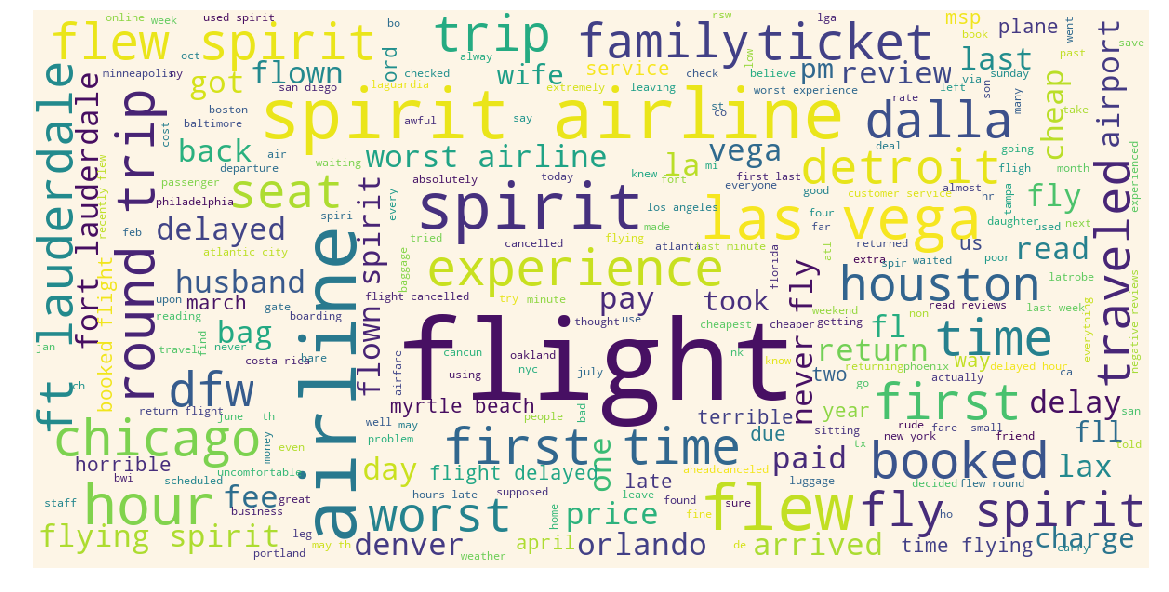

In [47]:
show_wordcloud(airline['content'].loc[airline['title'] == 'Spirit Airlines customer review'].to_string(index=False),'oldlace')

In [11]:
spritList = airline['content'].loc[airline['title'] == 'Spirit Airlines customer review'].tolist()

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

tweetList=[]
stops = set(STOPWORDS)
stemmer = nltk.stem.SnowballStemmer('english')
lemmatizer = nltk.wordnet.WordNetLemmatizer()

for tweet in spritList:
    rawTweet = tweet
    #print(rawTweet)
    #print(processedTweet)
    processedTweet = rawTweet.strip()
    processedTweet = processedTweet.translate(str.maketrans('','',string.punctuation))
    processedTweet = review_to_words(processedTweet)
    tweetTokens = nltk.word_tokenize(processedTweet)

    for token in tweetTokens:
        if token in stops:
            tweetTokens.remove(token)

    for token in tweetTokens:
        oldToken = token
        tweetTokens.remove(token)
        oldToken = lemmatizer.lemmatize(oldToken)
        tweetTokens.append(oldToken)

    processedTweet = ' '.join(tweetTokens)
    #print(processedTweet)

    if len(tweetTokens) > 3:
        tweetList.append(processedTweet)
#print(tweetList)

texts = [[text for text in doc.split()] for doc in tweetList]
#print(texts)
dictionary = corpora.Dictionary(texts)
#print("printing dictionary",dictionary.token2id)
#print(dictionary)
doc_term_matrix = [dictionary.doc2bow(doc.split()) for doc in tweetList]
#print(doc_term_matrix)
ldaObject1 = gensim.models.ldamodel.LdaModel
ldaModel1 = ldaObject1(doc_term_matrix,num_topics=3,id2word=dictionary,passes=20)
print(ldaModel1.print_topics(num_topics=3, num_words=10))
print("LDA analysis complete")



[(0, '0.029*"flight" + 0.022*"spirit" + 0.016*"airline" + 0.016*"seat" + 0.011*"time" + 0.009*"bag" + 0.009*"pay" + 0.008*"fly" + 0.008*"trip" + 0.007*"plane"'), (1, '0.056*"flight" + 0.019*"spirit" + 0.015*"hour" + 0.014*"delayed" + 0.011*"airline" + 0.011*"plane" + 0.011*"time" + 0.010*"pm" + 0.010*"told" + 0.010*"airport"'), (2, '0.023*"flight" + 0.014*"bag" + 0.012*"spirit" + 0.011*"pay" + 0.011*"airline" + 0.010*"check" + 0.009*"seat" + 0.008*"time" + 0.008*"one" + 0.008*"carry"')]
LDA analysis complete


In [16]:
vis_data = gensimvis.prepare(ldaModel1, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)